c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2207 - loss: 2.0986 - val_accuracy: 0.3546 - val_loss: 1.8088
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3642 - loss: 1.7673 - val_accuracy: 0.3922 - val_loss: 1.7400
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4012 - loss: 1.6761 - val_accuracy: 0.3952 - val_loss: 1.6806
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4176 - loss: 1.6187 - val_accuracy: 0.4358 - val_loss: 1.5964
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4310 - loss: 1.5879 - val_accuracy: 0.4538 - val_loss: 1.5562
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4507 - loss: 1.5347 - val_accuracy: 0.4464 - val_loss: 1.5524
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4627 - loss: 1.5069 - val_accuracy: 0.4450 - val_loss: 1.5681
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4612 - loss: 1.4974 - 

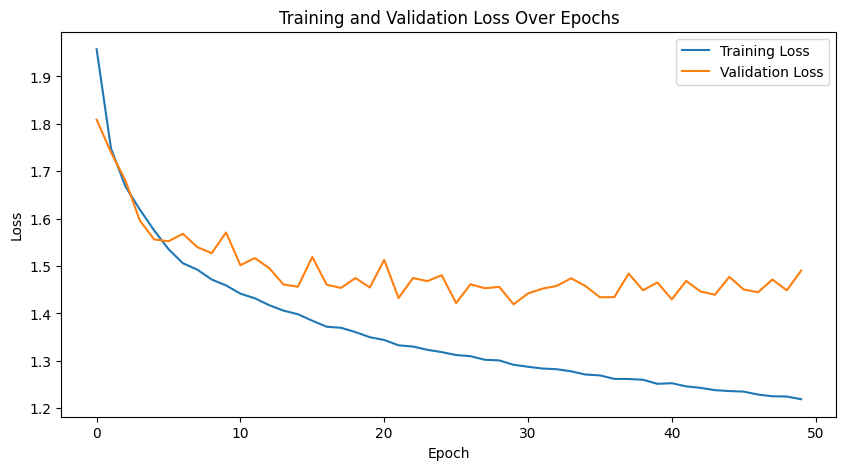

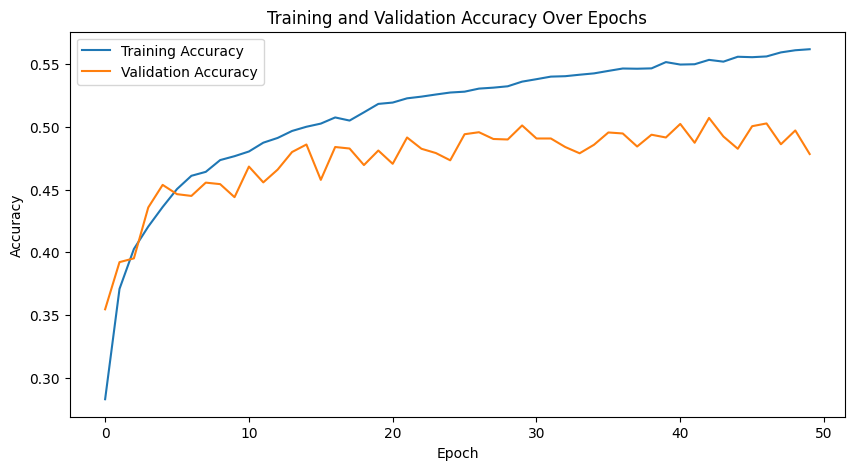

Training Accuracy: 0.5453799962997437
Testing Accuracy: 0.4749999940395355
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


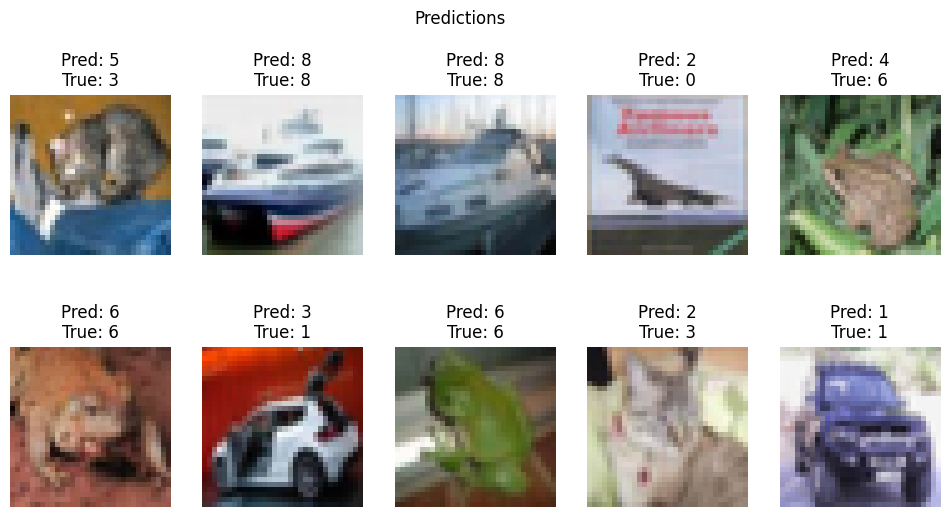

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on both training and testing data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Training Accuracy: {train_acc}')
print(f'Testing Accuracy: {test_acc}')

# Make predictions on some test images
predictions = model.predict(x_test)

# Display some images and their predicted labels
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Predictions')
for i in range(10):
    ax = axs[i // 5, i % 5]
    ax.imshow(x_test[i])
    predicted_label = predictions[i].argmax(axis=-1)
    true_label = y_test[i][0]
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}")
    ax.axis('off')
plt.show()
